In [93]:
%pylab inline
from numpy import *

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [94]:
Orbittime = 90 #(min)
Orbit = 60*Orbittime #(sec)

emissivity = .8
mass = 500. #(g)
heatCapacity = .88 #J/(g*degreesC)
solarConstant = 1.32 #kW/m^2
bman = 5.670373*10**-8 #W/(m^2 K^4)
SunIncidentArea = .03 #m^2
surfaceArea = .03*4 + .01*2
numOrbits = 5

In [95]:
incoming = zeros(Orbit)
incoming[:2700] = 1320
incomingHeat = numpy.array(incoming)
for x in arange(numOrbits-1):
    incomingHeat = numpy.append(incomingHeat,incoming)
#incomingHeat = incomingHeat + incoming


In [96]:
time = arange(size(incomingHeat))

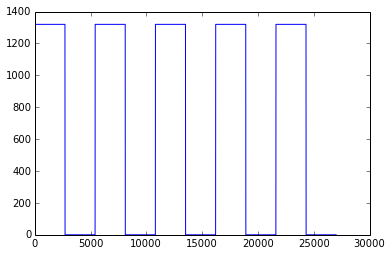

In [97]:
plot(time,incomingHeat)

In [161]:
def f(startTemp,incomingHeat, emissivity, mass,heatCapacity, SunIncidentArea,surfaceArea,heaterPower):
    temp = zeros(size(incomingHeat))
    print size(incomingHeat)
    print size(temp)
    temp[0] = startTemp
    print temp[0]
    dothis = True
    totalHeaterPower = 0
    for i in arange(1,size(temp)):
        tempHeaterPower = 0
        if(temp[i-1] < 273):
            tempHeaterPower = heaterPower
            totalHeaterPower = totalHeaterPower + heaterPower
            
        dQ = incomingHeat[i]*SunIncidentArea - emissivity*surfaceArea*bman*temp[i-1]**4 + tempHeaterPower
        newTemp = temp[i-1] + dQ/heatCapacity/mass
        
        #if(dothis):
        #    print(newTemp)
        #    print dQ
        #    dothis= False
        temp[i] = newTemp
    print totalHeaterPower
    print "Wh used per orbit:"
    print totalHeaterPower/60/60/numOrbits
    
    return temp

In [162]:
tempGraph = f(300,incomingHeat, emissivity,mass, heatCapacity,SunIncidentArea, surfaceArea,30)


27000
27000
300.0
405690
Wh used per orbit:
22


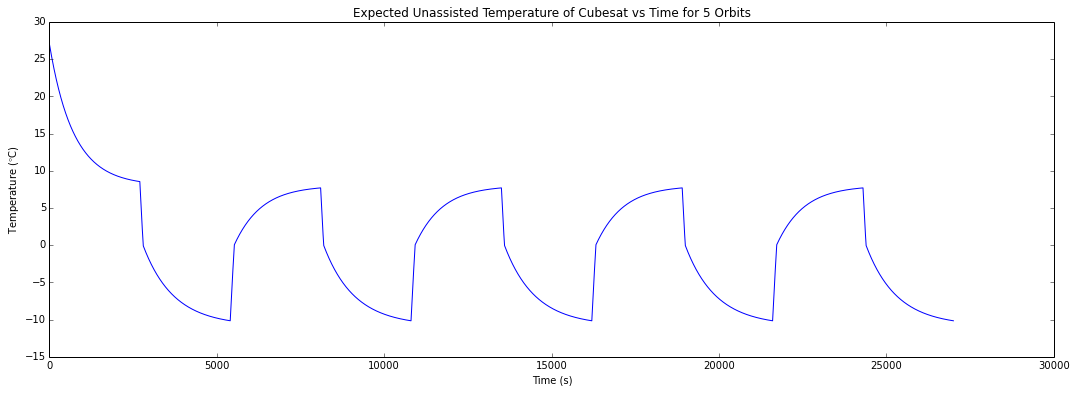

In [158]:
figure(figsize = (18,6))
plot(time,tempGraph-273)
ylabel("Temperature ($\degree$C)")
xlabel("Time (s)")
title("Expected Unassisted Temperature of Cubesat vs Time for %i Orbits"%numOrbits)

savefig("expectedTempGraph")